# ASSIGNMENT 1: SUPERVISED AND UNSUPERVISED LEARNING
This assignment will cover the various models taught in class that are regularly used for supervised and unsupervised learning.

Recall that Supervised Learning is the paradigm of machine learning that makes use of data labels for training, along with the data features, while  unsupervised relies only on data features.


**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.
- Classification: The output labels are discrete in nature.

We'll begin with classification. Recall some of the models taught for the same- **Logistic Regression, Support Vector Machine, KNN, Naive Bayes, Decision Trees and Random Forests**

### BINARY CLASSIFICATION

In [3]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 70.6MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [4]:
df = pd.read_csv('/content/nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [5]:
df.shape

(1340, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [7]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [8]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()


Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

**What is the shape of the dataframe now?**

In [11]:
print('Shape of the dataframe post dropping rows with NaN values is:',df.shape)

Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [12]:
X = df.drop(columns=['TARGET_5Yrs','Name'])
y = df['TARGET_5Yrs']
print(X.shape)
print(y.shape)


(1329, 19)
(1329,)


The shape of the features datafarme is: (1329, 19)
The shape of the labels dataframe is: (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [13]:
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state=46 )
print('The shape of training features dataframe is:',X_train.shape)
print('The shape of testing features dataframe is:',X_test.shape)
print('The shape of training labels dataframe is:',y_train.shape)
print('The shape of test labels dataframe is:',y_test.shape)
ratio = X_train.shape[0]/X_test.shape[0]
print('The train-to-test split ratio is:',ratio)

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [15]:
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [18]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy of the model is: ", accuracy)
print("F1 score of the model is: ", f1)
print("Precision of the model is: ",precision)
print("Recall of the model is: ", recall)

Accuracy of the model is:  0.6917293233082706
F1 score of the model is:  0.7630057803468209
Precision of the model is:  0.7333333333333333
Recall of the model is:  0.7951807228915663


Accuracy of the model is: 0.6992481203007519
F1 score of the model is: 0.7727272727272728
Precision of the model is: 0.7513812154696132
Recall of the model is: 0.7953216374269005


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [19]:
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [20]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [21]:
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
print("Accuracy of the model is: ", accuracy_svm)
print("F1 score of the model is: ", f1_svm)
print("Precision of the model is: ",precision_svm)
print("Recall of the model is: ", recall_svm)

Accuracy of the model is:  0.6954887218045113
F1 score of the model is:  0.7652173913043478
Precision of the model is:  0.7374301675977654
Recall of the model is:  0.7951807228915663


Accuracy of the model is: 0.7030075187969925
F1 score of the model is: 0.7835616438356164
Precision of the model is: 0.7371134020618557
Recall of the model is: 0.8362573099415205


### MULTICLASS CLASSIFICATION

In [22]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 70.1MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [23]:
scl = pd.read_csv('/content/social_well_being.csv')

**Always analyse the data.**

In [24]:
scl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [25]:
scl.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [26]:
scl.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [27]:
classess = scl['Dominant_Emotion'].unique()
print('The classes are:',classess)

The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [28]:
genders = scl['Gender'].unique()
plats = scl['Platform'].unique()
print('The genders are:', genders)
print('The platforms used are:', plats)

The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [29]:
import pandas

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [30]:
gender_ohc = pd.get_dummies(scl['Gender'], dtype=int)
scl_encoded = pd.concat([scl, gender_ohc], axis=1)
scl_encoded = scl_encoded.drop(columns = ['Gender'])
scl_encoded

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [31]:
platform_ohc = pd.get_dummies(scl_encoded['Platform'], dtype=int)
scl_encoded = pd.concat([scl_encoded, platform_ohc], axis=1)
scl_encoded = scl_encoded.drop(columns = ['Platform'])
scl_encoded

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [32]:
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [33]:
lab_encode = LabelEncoder()
scl_encoded['Dominant_Emotion_Encoded'] = scl_encoded['Dominant_Emotion']
scl_encoded['Dominant_Emotion_Encoded'] = lab_encode.fit_transform(scl_encoded['Dominant_Emotion'])
scl_encoded = scl_encoded.drop(columns = ['Dominant_Emotion'])
scl_encoded

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [34]:
x_knn = scl_encoded.drop(columns = ['Dominant_Emotion_Encoded','User_ID'])
y_knn = scl_encoded['Dominant_Emotion_Encoded']
x_knn_train,x_knn_test,y_knn_train,y_knn_test = train_test_split(x_knn,y_knn,test_size = 0.2, random_state = 69)
print('The shape of training features dataframe is:',x_knn_train.shape)
print('The shape of testing features dataframe is:',x_knn_test.shape)
print('The shape of training labels dataframe is:',y_knn_train.shape)
print('The shape of test labels dataframe is:',y_knn_test.shape)
ratio_knn = x_knn_train.shape[0]/x_knn_test.shape[0]
print('The train-to-test split ratio is:',ratio_knn)

The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [36]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_knn_train,y_knn_train)

KNeighborsClassifier()

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [38]:
y_pred_knn = knn_model.predict(x_knn_test)
prediction = pd.DataFrame({'Dominant_Emotion_Encoded_Predicted':y_pred_knn})
prediction

,Dominant_Emotion_Encoded_Predicted
0,5
1,1
2,5
3,2
4,0
...,...
180,1
181,0
182,1
183,4


,Dominant_Emotion_Encoded_Predicted
0,5
1,5
2,1
3,1
4,4
...,...
180,4
181,1
182,5
183,3


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [39]:
y_pred_original = lab_encode.inverse_transform(y_pred_knn)
print(y_pred_original)

['Sadness' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Anxiety' 'Happiness'
 'Boredom' 'Anger' 'Anxiety' 'Happiness' 'Sadness' 'Happiness' 'Neutral'
 'Happiness' 'Anger' 'Happiness' 'Happiness' 'Anger' 'Happiness'
 'Happiness' 'Happiness' 'Sadness' 'Neutral' 'Anxiety' 'Sadness' 'Anxiety'
 'Neutral' 'Happiness' 'Boredom' 'Sadness' 'Happiness' 'Neutral' 'Anger'
 'Sadness' 'Sadness' 'Anxiety' 'Neutral' 'Happiness' 'Sadness' 'Neutral'
 'Boredom' 'Anxiety' 'Neutral' 'Anxiety' 'Happiness' 'Anxiety' 'Happiness'
 'Sadness' 'Anxiety' 'Happiness' 'Neutral' 'Anger' 'Happiness' 'Neutral'
 'Boredom' 'Anger' 'Happiness' 'Happiness' 'Boredom' 'Boredom' 'Neutral'
 'Neutral' 'Anxiety' 'Sadness' 'Happiness' 'Sadness' 'Happiness' 'Neutral'
 'Anxiety' 'Anxiety' 'Anxiety' 'Boredom' 'Anger' 'Anger' 'Neutral'
 'Anxiety' 'Sadness' 'Happiness' 'Boredom' 'Anger' 'Neutral' 'Anxiety'
 'Happiness' 'Anger' 'Neutral' 'Anxiety' 'Anger' 'Sadness' 'Sadness'
 'Happiness' 'Neutral' 'Boredom' 'Happiness' 'Anxiety' 'Neutral' 'S

['Sadness' 'Sadness' 'Anxiety' 'Anxiety' 'Neutral' 'Sadness' 'Anxiety'
 'Anxiety' 'Neutral' 'Neutral' 'Happiness' 'Sadness' 'Anxiety' 'Happiness'
 'Sadness' 'Neutral' 'Neutral' 'Sadness' 'Neutral' 'Sadness' 'Happiness'
 'Neutral' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Happiness' 'Anxiety'
 'Happiness' 'Anxiety' 'Neutral' 'Happiness' 'Happiness' 'Anxiety'
 'Sadness' 'Anxiety' 'Happiness' 'Boredom' 'Neutral' 'Neutral' 'Anxiety'
 'Neutral' 'Happiness' 'Happiness' 'Happiness' 'Neutral' 'Sadness'
 'Sadness' 'Happiness' 'Sadness' 'Boredom' 'Sadness' 'Anger' 'Happiness'
 'Sadness' 'Sadness' 'Happiness' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Anger' 'Neutral' 'Neutral' 'Neutral' 'Happiness' 'Anxiety'
 'Anxiety' 'Happiness' 'Happiness' 'Anger' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Anger' 'Happiness' 'Sadness'
 'Anxiety' 'Happiness' 'Anger' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Happiness' 'Anxiety' 'Sadness' 'Sadness' 'Anger' 'Happiness' 'Anger'
 'Ange

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [40]:
accuracy_knn = accuracy_score(y_knn_test, y_pred_knn)
print("Accuracy of the model is:",accuracy_knn)

Accuracy of the model is: 0.9675675675675676


Accuracy of the model is: 0.9837837837837838


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
y_test_original = lab_encode.inverse_transform(y_knn_test)
cm_knn = confusion_matrix(y_test_original, y_pred_original)
print('The cofusion matrix is:\n',cm_knn)
cr_knn = classification_report(y_test_original, y_pred_original)
print('The classification report is:\n',cr_knn)


The cofusion matrix is:
 [[29  1  0  0  0  0]
 [ 0 29  0  1  1  1]
 [ 0  0 21  0  0  0]
 [ 0  0  0 39  0  0]
 [ 0  0  0  0 31  0]
 [ 0  0  1  0  1 30]]
The classification report is:
               precision    recall  f1-score   support

       Anger       1.00      0.97      0.98        30
     Anxiety       0.97      0.91      0.94        32
     Boredom       0.95      1.00      0.98        21
   Happiness       0.97      1.00      0.99        39
     Neutral       0.94      1.00      0.97        31
     Sadness       0.97      0.94      0.95        32

    accuracy                           0.97       185
   macro avg       0.97      0.97      0.97       185
weighted avg       0.97      0.97      0.97       185



The cofusion matrix is:
[[22  0  0  0  0  0]
 [ 0 32  0  0  0  1]
 [ 0  0 15  0  0  1]
 [ 0  0  0 47  0  0]
 [ 0  1  0  0 35  0]
 [ 0  0  0  0  0 31]]
The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        22
     Anxiety       0.97      0.97      0.97        33
     Boredom       1.00      0.94      0.97        16
   Happiness       1.00      1.00      1.00        47
     Neutral       1.00      0.97      0.99        36
     Sadness       0.94      1.00      0.97        31

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [46]:
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [48]:
gauss_nb = GaussianNB()
gauss_nb.fit(x_knn_train,y_knn_train)

GaussianNB()

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [55]:
y_pred_gnb = gauss_nb.predict(x_knn_test)
predictio_gnb = pd.DataFrame({'Dominant_Emotion_Encoded_Predicted':y_pred_gnb})
y_pred_gnb_org = lab_encode.inverse_transform(y_pred_gnb)
print(y_pred_gnb_org)

['Anger' 'Boredom' 'Anger' 'Boredom' 'Anger' 'Boredom' 'Happiness'
 'Boredom' 'Anger' 'Anger' 'Happiness' 'Anger' 'Sadness' 'Happiness'
 'Happiness' 'Anger' 'Happiness' 'Happiness' 'Anger' 'Happiness'
 'Happiness' 'Happiness' 'Boredom' 'Boredom' 'Anger' 'Boredom' 'Anger'
 'Anger' 'Happiness' 'Anger' 'Happiness' 'Happiness' 'Sadness' 'Boredom'
 'Boredom' 'Sadness' 'Happiness' 'Boredom' 'Happiness' 'Anger' 'Boredom'
 'Boredom' 'Anger' 'Boredom' 'Boredom' 'Happiness' 'Boredom' 'Happiness'
 'Boredom' 'Happiness' 'Happiness' 'Boredom' 'Anger' 'Happiness' 'Sadness'
 'Boredom' 'Anger' 'Happiness' 'Happiness' 'Boredom' 'Boredom' 'Happiness'
 'Boredom' 'Anger' 'Anger' 'Happiness' 'Boredom' 'Sadness' 'Boredom'
 'Boredom' 'Anger' 'Anger' 'Boredom' 'Anger' 'Anger' 'Boredom' 'Anger'
 'Boredom' 'Sadness' 'Boredom' 'Anger' 'Boredom' 'Boredom' 'Happiness'
 'Anger' 'Sadness' 'Boredom' 'Boredom' 'Anger' 'Boredom' 'Happiness'
 'Sadness' 'Boredom' 'Happiness' 'Sadness' 'Boredom' 'Sadness' 'Anger'
 'Boredo

**Finally, print the accuracy, confusion matrix and classification report.**

In [52]:
accuracy_gnb = accuracy_score(y_knn_test, y_pred_gnb)
print("Accuracy of the model is:",accuracy_gnb)
cm_gnb = confusion_matrix(y_test_original, y_pred_gnb_org)
print('The cofusion matrix is:\n',cm_gnb)
cr_gnb = classification_report(y_test_original, y_pred_gnb_org)
print('The classification report is:\n',cr_gnb)

Accuracy of the model is: 0.4594594594594595
The cofusion matrix is:
 [[25  0  4  1  0  0]
 [ 8  0 17  5  0  2]
 [ 2  0 19  0  0  0]
 [ 3  0  0 33  0  3]
 [ 5  0 15  4  0  7]
 [10  0 11  3  0  8]]
The classification report is:
               precision    recall  f1-score   support

       Anger       0.47      0.83      0.60        30
     Anxiety       0.00      0.00      0.00        32
     Boredom       0.29      0.90      0.44        21
   Happiness       0.72      0.85      0.78        39
     Neutral       0.00      0.00      0.00        31
     Sadness       0.40      0.25      0.31        32

    accuracy                           0.46       185
   macro avg       0.31      0.47      0.35       185
weighted avg       0.33      0.46      0.36       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is: 0.4540540540540541
The cofusion matrix is:
[[18  0  3  1  0  0]
 [ 6  0 14  9  0  4]
 [ 1  0 15  0  0  0]
 [ 1  0  0 44  0  2]
 [ 4  0 22  6  0  4]
 [14  0  9  1  0  7]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.41      0.82      0.55        22
     Anxiety       0.00      0.00      0.00        33
     Boredom       0.24      0.94      0.38        16
   Happiness       0.72      0.94      0.81        47
     Neutral       0.00      0.00      0.00        36
     Sadness       0.41      0.23      0.29        31

    accuracy                           0.45       185
   macro avg       0.30      0.49      0.34       185
weighted avg       0.32      0.45      0.35       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_knn_train,y_knn_train)

DecisionTreeClassifier()

In [56]:
y_pred_dtc = dtc_model.predict(x_knn_test)
y_pred_dtc_org = lab_encode.inverse_transform(y_pred_dtc)
print(y_pred_dtc_org)

['Sadness' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Boredom' 'Happiness'
 'Boredom' 'Anger' 'Anxiety' 'Happiness' 'Sadness' 'Happiness' 'Neutral'
 'Happiness' 'Anger' 'Happiness' 'Happiness' 'Anger' 'Happiness'
 'Happiness' 'Happiness' 'Sadness' 'Anxiety' 'Anxiety' 'Sadness' 'Neutral'
 'Neutral' 'Happiness' 'Boredom' 'Sadness' 'Happiness' 'Neutral' 'Anger'
 'Sadness' 'Sadness' 'Anxiety' 'Neutral' 'Happiness' 'Sadness' 'Neutral'
 'Boredom' 'Anxiety' 'Neutral' 'Anxiety' 'Happiness' 'Anxiety' 'Happiness'
 'Sadness' 'Anxiety' 'Happiness' 'Neutral' 'Anger' 'Happiness' 'Neutral'
 'Boredom' 'Anger' 'Happiness' 'Happiness' 'Boredom' 'Boredom' 'Neutral'
 'Neutral' 'Anxiety' 'Sadness' 'Happiness' 'Sadness' 'Happiness' 'Neutral'
 'Anxiety' 'Anxiety' 'Anxiety' 'Boredom' 'Anger' 'Anger' 'Neutral'
 'Anxiety' 'Sadness' 'Happiness' 'Boredom' 'Anger' 'Neutral' 'Anxiety'
 'Happiness' 'Anger' 'Neutral' 'Anxiety' 'Anger' 'Sadness' 'Sadness'
 'Happiness' 'Sadness' 'Boredom' 'Happiness' 'Anxiety' 'Neutral' 'S

In [57]:
accuracy_dtc = accuracy_score(y_knn_test, y_pred_dtc)
print("Accuracy of the model is:",accuracy_dtc)
cm_dtc = confusion_matrix(y_test_original, y_pred_dtc_org)
print('The cofusion matrix is:\n',cm_dtc)
cr_dtc = classification_report(y_test_original, y_pred_dtc_org)
print('The classification report is:\n',cr_dtc)

Accuracy of the model is: 0.9621621621621622
The cofusion matrix is:
 [[29  0  0  0  1  0]
 [ 0 28  1  1  0  2]
 [ 0  1 20  0  0  0]
 [ 0  0  0 39  0  0]
 [ 0  0  0  0 31  0]
 [ 1  0  0  0  0 31]]
The classification report is:
               precision    recall  f1-score   support

       Anger       0.97      0.97      0.97        30
     Anxiety       0.97      0.88      0.92        32
     Boredom       0.95      0.95      0.95        21
   Happiness       0.97      1.00      0.99        39
     Neutral       0.97      1.00      0.98        31
     Sadness       0.94      0.97      0.95        32

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185



In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_knn_train,y_knn_train)

RandomForestClassifier()

In [60]:
y_pred_rfc = rfc_model.predict(x_knn_test)
y_pred_rfc_org = lab_encode.inverse_transform(y_pred_rfc)
print(y_pred_rfc_org)

['Sadness' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Boredom' 'Happiness'
 'Boredom' 'Anger' 'Anxiety' 'Happiness' 'Sadness' 'Happiness' 'Neutral'
 'Happiness' 'Anger' 'Happiness' 'Happiness' 'Anger' 'Happiness'
 'Happiness' 'Happiness' 'Anxiety' 'Boredom' 'Anxiety' 'Sadness' 'Anger'
 'Neutral' 'Happiness' 'Boredom' 'Sadness' 'Happiness' 'Neutral' 'Anger'
 'Sadness' 'Sadness' 'Anxiety' 'Neutral' 'Happiness' 'Sadness' 'Neutral'
 'Boredom' 'Anxiety' 'Neutral' 'Anxiety' 'Happiness' 'Anxiety' 'Happiness'
 'Sadness' 'Anxiety' 'Happiness' 'Neutral' 'Anger' 'Happiness' 'Neutral'
 'Boredom' 'Anger' 'Happiness' 'Happiness' 'Boredom' 'Boredom' 'Neutral'
 'Neutral' 'Anxiety' 'Sadness' 'Happiness' 'Sadness' 'Happiness' 'Neutral'
 'Anxiety' 'Anxiety' 'Anxiety' 'Boredom' 'Anger' 'Anger' 'Neutral'
 'Anxiety' 'Sadness' 'Happiness' 'Boredom' 'Anger' 'Neutral' 'Anxiety'
 'Happiness' 'Anger' 'Neutral' 'Anxiety' 'Anger' 'Sadness' 'Sadness'
 'Happiness' 'Sadness' 'Boredom' 'Happiness' 'Anxiety' 'Neutral' 'Sad

In [61]:
accuracy_rfc = accuracy_score(y_knn_test, y_pred_rfc)
print("Accuracy of the model is:",accuracy_rfc)
cm_rfc = confusion_matrix(y_test_original, y_pred_rfc_org)
print('The cofusion matrix is:\n',cm_rfc)
cr_rfc = classification_report(y_test_original, y_pred_rfc_org)
print('The classification report is:\n',cr_rfc)

Accuracy of the model is: 0.9783783783783784
The cofusion matrix is:
 [[30  0  0  0  0  0]
 [ 1 28  2  1  0  0]
 [ 0  0 21  0  0  0]
 [ 0  0  0 39  0  0]
 [ 0  0  0  0 31  0]
 [ 0  0  0  0  0 32]]
The classification report is:
               precision    recall  f1-score   support

       Anger       0.97      1.00      0.98        30
     Anxiety       1.00      0.88      0.93        32
     Boredom       0.91      1.00      0.95        21
   Happiness       0.97      1.00      0.99        39
     Neutral       1.00      1.00      1.00        31
     Sadness       1.00      1.00      1.00        32

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



### REGRESSION


In [62]:
! gdown 1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX

Downloading...
From: https://drive.google.com/uc?id=1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX
To: /content/IPL 2022 Batters.csv
100% 7.91k/7.91k [00:00<00:00, 17.2MB/s]


**Import the csv `IPL 2022 Batters.csv` as a pandas dataframe.**

In [63]:
ipl = pd.read_csv('/content/IPL 2022 Batters.csv')

**First things first, analyze the data**

In [64]:
ipl.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s'],
      dtype='object')

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s'],
      dtype='object')

**Use a function to find out about the datatypes of the features**

In [66]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB


**Interestingly, not all features are numerical !**

Drop the irrelevant features and convert the non numerical features in to numerical ones by some procedure

In [67]:
values = []
for i,val in enumerate(ipl['Avg'].values) :
  if val == '-' :
    values.append(0)
  else :
    values.append(float(val))

ipl['Avg'] = values

In [68]:
values = []
for value in ipl['HS'].values :
  if value[-1] == '*' :
    value = value[:-1]
  values.append(int(value))

ipl['HS'] = values

In [70]:
ipl = ipl.drop(["Player"], axis = 1)

**Print the head to get a look at the data again**

In [73]:
ipl.head(25)

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,17,17,2,863,116,57.53,579,149.05,4,4,83
1,15,15,3,616,103,51.33,455,135.38,2,4,45
2,15,15,1,508,140,36.29,341,148.97,1,3,47
3,15,15,4,487,87,44.27,371,131.26,0,4,49
4,16,16,2,483,96,34.50,365,132.32,0,4,51
5,16,16,9,481,94,68.71,337,142.72,0,2,32
6,16,16,1,468,96,31.20,367,127.52,0,3,49
7,14,14,2,460,88,38.33,375,122.66,0,3,47
8,17,17,1,458,55,28.63,312,146.79,0,2,43
9,15,14,0,451,59,32.21,330,136.66,0,4,36


,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,17,17,2,863,116,57.53,579,149.05,4,4,83
1,15,15,3,616,103,51.33,455,135.38,2,4,45
2,15,15,1,508,140,36.29,341,148.97,1,3,47
3,15,15,4,487,87,44.27,371,131.26,0,4,49
4,16,16,2,483,96,34.50,365,132.32,0,4,51
5,16,16,9,481,94,68.71,337,142.72,0,2,32
6,16,16,1,468,96,31.20,367,127.52,0,3,49
7,14,14,2,460,88,38.33,375,122.66,0,3,47
8,17,17,1,458,55,28.63,312,146.79,0,2,43
9,15,14,0,451,59,32.21,330,136.66,0,4,36


**Check for null values and drop them if found**

In [75]:
ipl.isnull().sum()

Mat     0
Inns    0
NO      0
Runs    0
HS      0
Avg     0
BF      0
SR      0
100     0
50      0
4s      0
dtype: int64

**Examine the shape of the dataset**

In [76]:
ipl.shape

(162, 11)

(162, 11)

In [77]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     162 non-null    int64  
 1   Inns    162 non-null    int64  
 2   NO      162 non-null    int64  
 3   Runs    162 non-null    int64  
 4   HS      162 non-null    int64  
 5   Avg     162 non-null    float64
 6   BF      162 non-null    int64  
 7   SR      162 non-null    float64
 8   100     162 non-null    int64  
 9   50      162 non-null    int64  
 10  4s      162 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 14.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     162 non-null    int64  
 1   Inns    162 non-null    int64  
 2   NO      162 non-null    int64  
 3   Runs    162 non-null    int64  
 4   HS      162 non-null    int64  
 5   Avg     162 non-null    float64
 6   BF      162 non-null    int64  
 7   SR      162 non-null    float64
 8   100     162 non-null    int64  
 9   50      162 non-null    int64  
 10  4s      162 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 14.0 KB


**Separate the features and the target label**

What type of target features are associated with a Regression task ?

Continuous ones, yes. In this dataset, all the features are continuous ones. Let's pick the number of 4s as the prediction target for now.

In [79]:
x_reg = ipl.drop(columns = ['4s'])
y_reg = ipl['4s']
print(x_reg.shape)
print(y_reg.shape)

(162, 10)
(162,)


**Split the dataset into training set and testing set**

Pick a suitable test size

In [82]:
x_reg_train,x_reg_test,y_reg_train,y_reg_test = train_test_split(x_reg,y_reg,test_size=0.15,random_state = 69)
print(x_reg_train.shape)
print(x_reg_test.shape)
print(y_reg_train.shape)
print(y_reg_test.shape)

(137, 10)
(25, 10)
(137,)
(25,)


**Import Linear Regression from sklearn**

In [84]:
from sklearn.linear_model import LinearRegression

**Create a model**

In [85]:
lin_reg = LinearRegression()

**Use this model to fit on training data**

In [86]:
lin_reg.fit(x_reg_train,y_reg_train)

LinearRegression()

LinearRegression()

**Time to get some predictions**

In [89]:
y_reg_pred = lin_reg.predict(x_reg_test)
print(y_reg_pred)


[33.74916334  8.23418857  1.21621438 -0.8336749  13.20379151  4.97502401
 42.91089923  1.82770261  3.42278687 18.36996841  0.81789111  1.04931205
  2.29317746  1.14689164  0.26084881  9.11068069  1.0042876   1.01746508
 14.30485298 45.79733564  2.02227602 -0.2452159   3.09601907 14.02400979
 -0.13525546]


[ 1.05387986  0.85135457  0.9910092  12.99349914  3.48611309 29.50657853
  3.47331241 15.33855043  3.41591535 -0.26441354 36.93624221  4.38036815
 38.92041012  9.54401354 28.59449421 24.96473174  2.04562168  2.07735459
  5.01598211 36.25978411  8.25986538 35.83072782 40.67190397 46.4206017
 25.77293802 -0.05570364  1.69027357 14.41618655  1.07305857  1.48857523
  1.6278393   5.04182482 14.46614437]


**Find the MSE,MAE and RMSE for the model**

As an exercise, briefly write about these metrics below

MSE :

RMSE :

MAE :

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
print('The MSE is:',mse)
print('The RMSE is:',rmse)
print('The MAE is:',mae)


The MSE is: 3.8014245876774653
The RMSE is: 1.9497242337513951
The MAE is: 1.3751057076880593


**There you have it, your first regression model is ready!**

## UNSUPERVISED LEARNING

In [92]:
! gdown 1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw

Downloading...
From: https://drive.google.com/uc?id=1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw
To: /content/iris.csv
100% 2.47k/2.47k [00:00<00:00, 1.88MB/s]


**Load the iris dataset**

In [93]:
iris = pd.read_csv('/content/iris.csv')

**No need to mention what to do next :)**

In [96]:
print(iris.describe(percentiles=[.25, .5, .75]))

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [97]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Plot pairwise plot to see relations between the features**

Hint : Use the seaborn library for pairplots

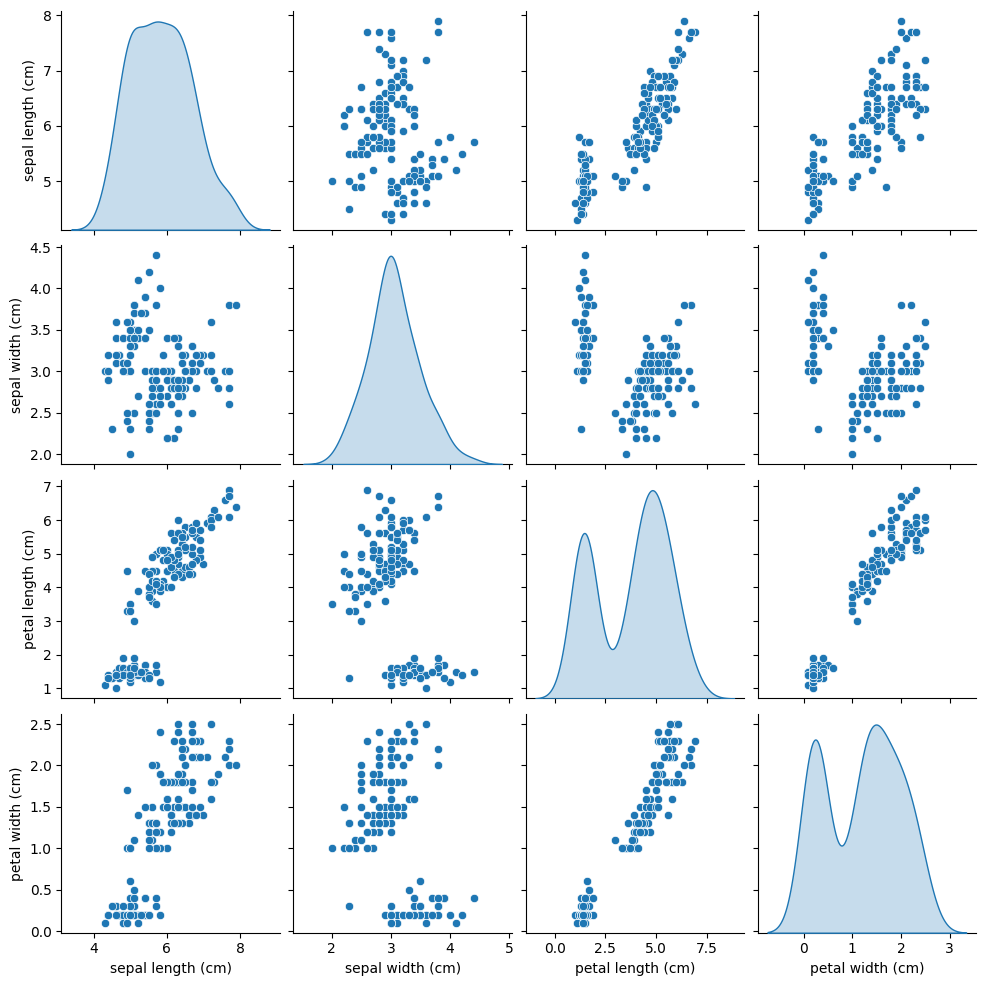

In [99]:
sns.pairplot(iris, diag_kind='kde')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

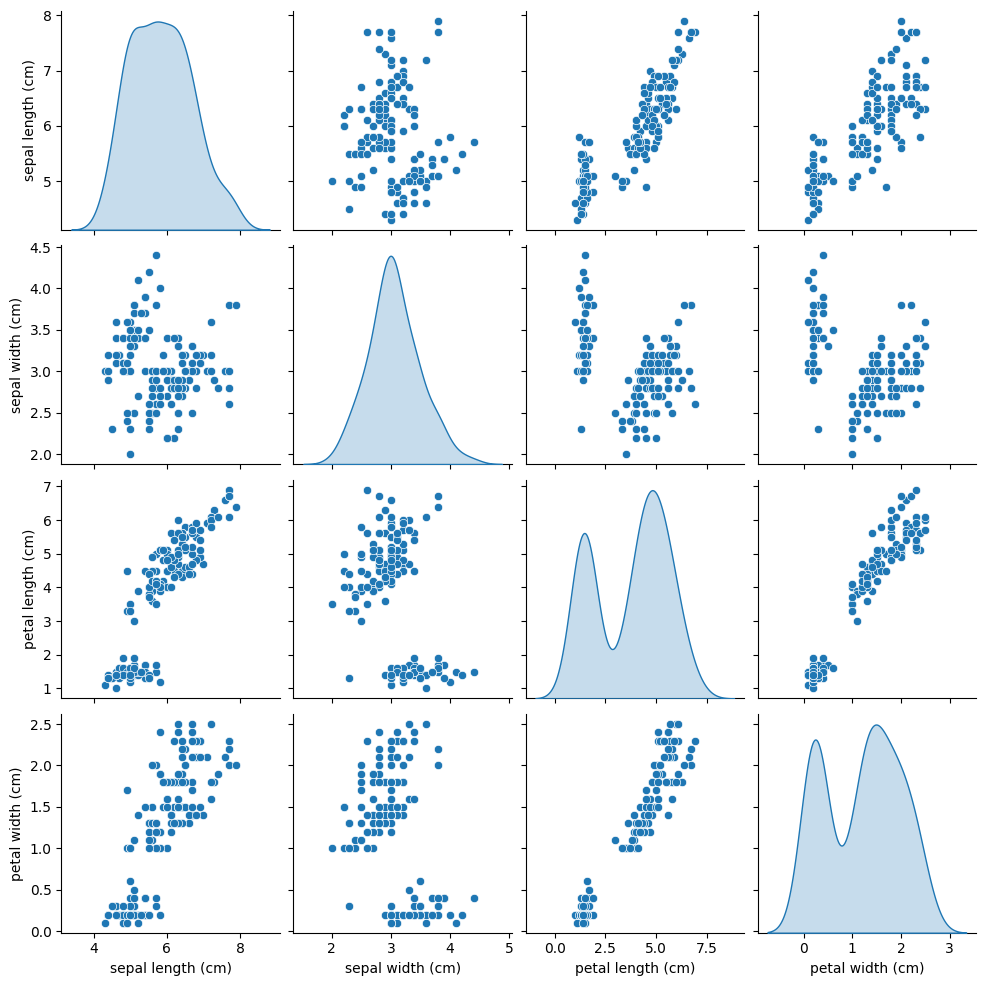

As apparent, there is no label assigned to these entries

**Therefore let us try to Cluster the data to see any similarities**

**Import KMeans from sklearn**

In [100]:
from sklearn.cluster import KMeans

**Perform K Means Clustering**

In [101]:
km_model = KMeans(n_clusters=3, random_state=42)
km_model.fit(iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

**Add cluster labels to the DataFrame**

In [102]:
iris['Cluster'] = km_model.labels_

**Analyse the clusters, find the centers and the number of observations in each cluster**

In [106]:
cluster_centers = km_model.cluster_centers_
cluster_sizes = iris['Cluster'].value_counts()
print(cluster_centers)
print(cluster_sizes)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Cluster
0    62
1    50
2    38
Name: count, dtype: int64


**Visualise the cluster, make the plot again but this time with labels**

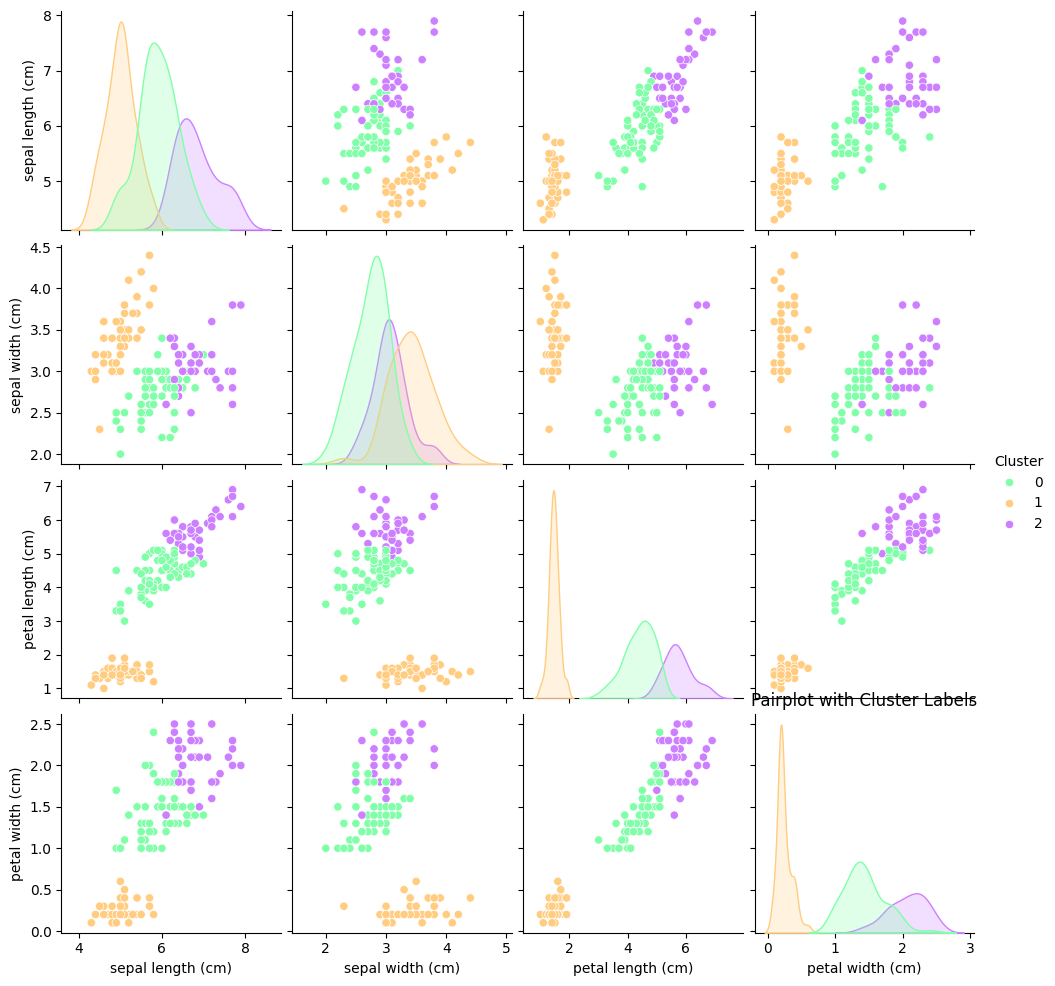

In [111]:
custom_palette = ['#80FFA8','#FFCC80',  '#CC80FF']

sns.pairplot(iris, hue='Cluster', diag_kind='kde',palette=custom_palette)
plt.title('Pairplot with Cluster Labels')
plt.show()

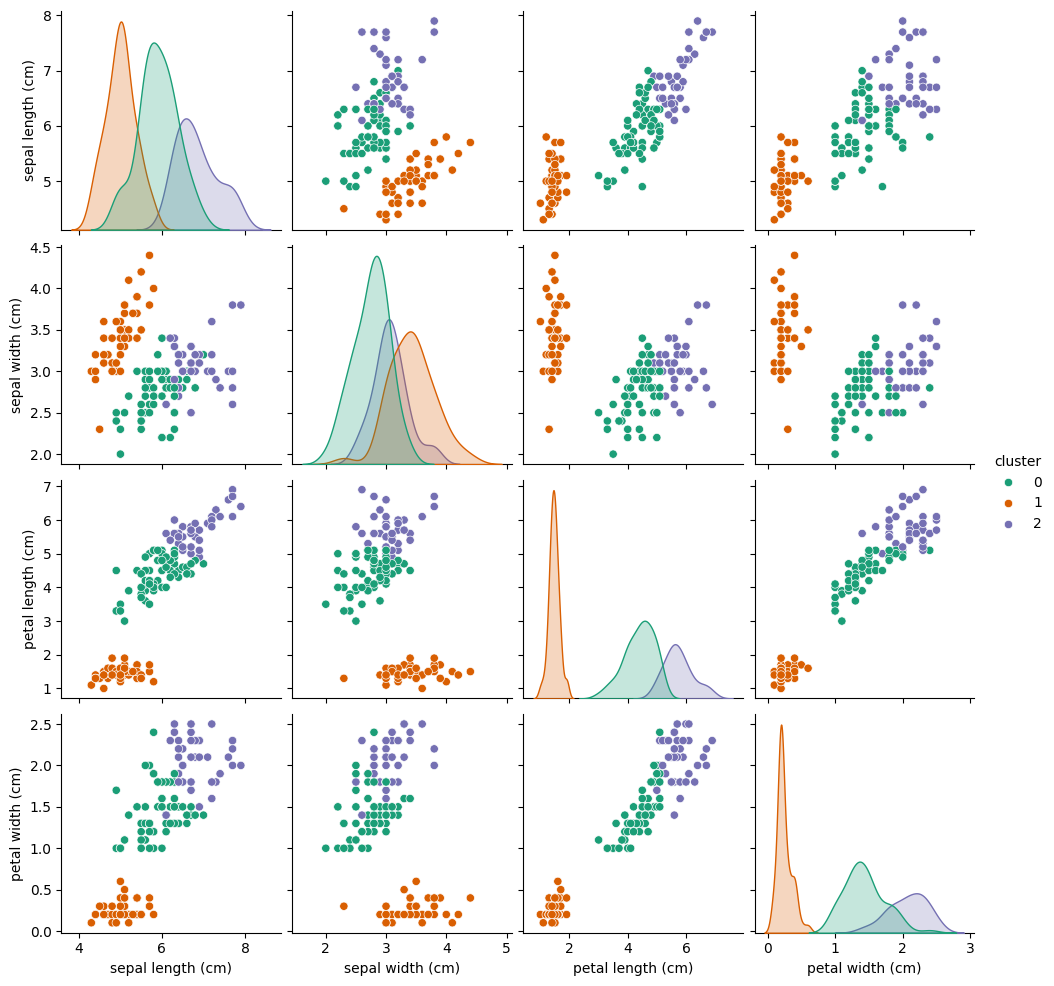

# GOOD JOB!